# ML Descritization
descritization is the process of converting continuous data into discrete data. It is used in classification algorithms.

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
#load titanic dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#misssing values count
df.isnull().sum().sort_values(ascending=False)


deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [9]:
#impute missing values with median
df['age']=df['age'].fillna(df['age'].median())


<Axes: xlabel='age', ylabel='Count'>

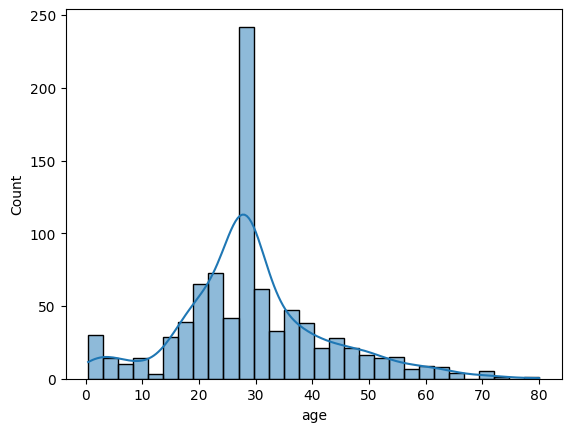

In [12]:
#histogram of age
sns.histplot(df['age'] , kde=True)

In [13]:
#discretization of age column 
age_disc=KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='kmeans') 

#fit and transform the data 
df['age_binned']=age_disc.fit_transform(df[['age']])
df.head()



c:\Users\HP\miniconda3\envs\ml_python\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_binned
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3.0


<Axes: xlabel='age', ylabel='Count'>

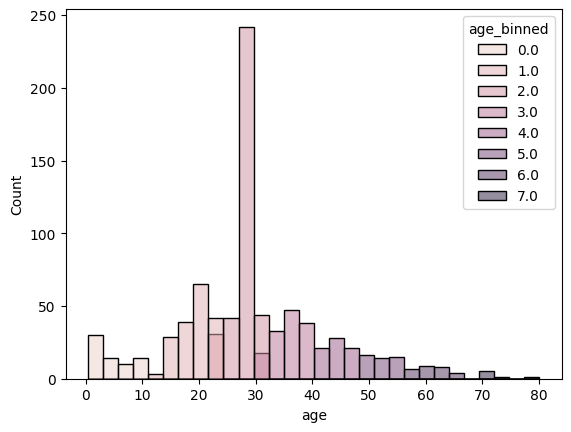

In [17]:
#histogram of age_binned
sns.histplot(df, x='age', hue='age_binned')


In [19]:
#manual binning of age using cut function 
df['age_binned']=pd.cut(df['age'],bins=
                        [0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50',
                                                                                  '50-60','60-70','70-80','80-90','90-100'])


<Axes: xlabel='age', ylabel='Count'>

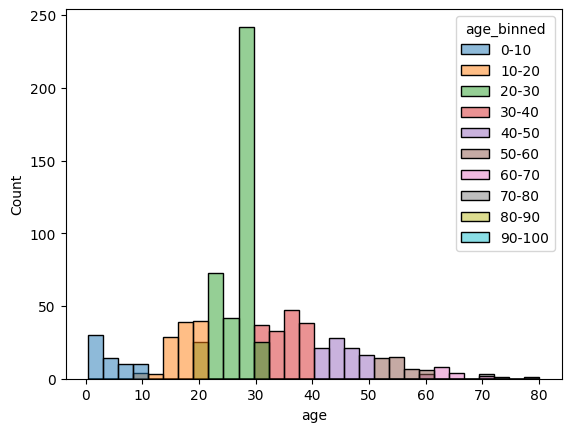

In [20]:
#histogram of age_binned
sns.histplot(df, x='age', hue='age_binned')